In [12]:
import io
import requests
import pandas as pd

data = requests.get('https://raw.githubusercontent.com/gastonstat/CreditScoring/master/CreditScoring.csv')

In [14]:
df = pd.read_csv(io.StringIO(data.text)) 

In [15]:
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [19]:
# Предсказывайте Status 1 (good) vs. Status 2 (bad)
# 0 выпилить
df.Status.value_counts()

1    3200
2    1254
0       1
Name: Status, dtype: int64

In [20]:
df = df[df['Status'] > 0]

In [21]:
df.Status.value_counts()

1    3200
2    1254
Name: Status, dtype: int64

In [22]:
X, y = df.drop('Status', 1), df['Status']

In [25]:
y -= 1

In [26]:
y.value_counts()

0    3200
1    1254
Name: Status, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


# Подберите наилучшие гиперпараметры для модели решающего дерева

In [28]:
from sklearn import linear_model
from sklearn import svm

from sklearn.grid_search import GridSearchCV
params_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(5, 10)),
    'max_features': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.0],
    'min_samples_leaf': list(range(3, 20))
}
gs = GridSearchCV(clf, params_grid, scoring='roc_auc', verbose=1)
gs.fit(X_train, y_train)

clf = gs.best_estimator_

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Fitting 3 folds for each of 1190 candidates, totalling 3570 fits


[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   21.6s finished


In [29]:
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

# Выберите наилучшую на Ваш взгляд метрику качества для этой задачи. Объясните свой выбор

In [30]:
'''Accuracy - Accuracy is the most intuitive performance measure 
and it is simply a ratio of correctly predicted observation to the total observations. 
One may think that, if we have high accuracy then our model is best. 
Yes, accuracy is a great measure but only when you have symmetric datasets 
where values of false positive and false negatives are almost same.

Accuracy = TP+TN/TP+FP+FN+TN
'''

from sklearn.metrics import accuracy_score
print('Decision tree accuracy: %.2f%%' % (100 * accuracy_score(clf.predict(X_test), y_test)))

Decision tree accuracy: 76.83%


In [34]:
'''
Precision - Precision is the ratio of correctly predicted positive observations 
to the total predicted positive observations.  
High precision relates to the low false positive rate. 

Precision = TP/TP+FP
'''
from sklearn.metrics import precision_score
print('Decision tree accuracy: %.2f%%' % (100 * precision_score(clf.predict(X_test), y_test)))

Decision tree accuracy: 54.69%


In [35]:
'''
Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations 
to the all observations in actual class - yes.  

Recall = TP/TP+FN

'''
from sklearn.metrics import recall_score
print('Decision tree accuracy: %.2f%%' % (100 * recall_score(clf.predict(X_test), y_test)))

Decision tree accuracy: 60.69%


In [39]:
'''
Let's start with the one popular tools to evaluate the performance of a model 
in tasks of classification or prediction:  The confusion matrix 
(in unsupervised learning it is typically called a matching matrix). 
Its focus is on the predictive capability of a model  rather than how fast 
the model takes to perform the classification, scalability, etc.

The confusion matrix is represented by a matrix which each row represents 
the instances in a predicted class, while each column represents in an actual class. 
One of the advantages of using this performance evaluation tool is that 
the data mining analyzer can easily see if the model is confusing two classes 
(i.e. commonly  mislabeling one as another).
'''


from sklearn.metrics import confusion_matrix
y_true = y_test
y_pred = clf.predict(X_test)
confusion_matrix(y_true, y_pred)

array([[409,  68],
       [ 87, 105]])

Confusion matrix, without normalization
[[409  68]
 [ 87 105]]
Normalized confusion matrix
[[0.86 0.14]
 [0.45 0.55]]


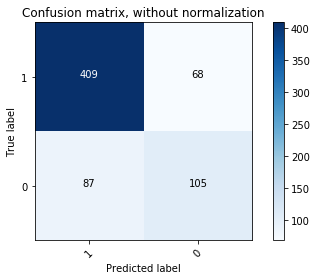

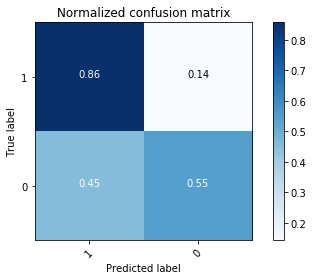

In [43]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

class_names = [1, 0]

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

Поупражнялись с метриками качества оценки модели, теперь выберем лучшие показатели на разных метриках как гиперпараметр Гридсерча

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV

clf = DecisionTreeClassifier()

params_grid = {'criterion': ['gini', 'entropy'],
               'max_depth': list(range(5, 10)),
               'max_features': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.0],
               'min_samples_leaf': list(range(3, 20))
              }
scorings = ['accuracy', 
            'f1', 
            'neg_log_loss', 
            'precision', 
            'r2', 
            'recall',
            'roc_auc', 
            'v_measure_score']

for i in scorings:
    gs = GridSearchCV(clf, params_grid, scoring=i, verbose=1)
    gs.fit(X_train, y_train)
    clf = gs.best_estimator_
    print('SCORING:', i)
    print(clf)
    print('accuracy: %.2f%%' % (100 * accuracy_score(clf.predict(X_test), y_test)))
    print('precision: %.2f%%' % (100 * precision_score(clf.predict(X_test), y_test)))
    print('recall: %.2f%%' % (100 * recall_score(clf.predict(X_test), y_test)))
    print('\n')

Fitting 3 folds for each of 1190 candidates, totalling 3570 fits


[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   20.9s finished


SCORING: accuracy
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=16, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
accuracy: 76.53%
precision: 48.44%
recall: 61.59%


Fitting 3 folds for each of 1190 candidates, totalling 3570 fits


[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   21.9s finished


SCORING: f1
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=0.9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=17, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
accuracy: 78.33%
precision: 42.19%
recall: 70.43%


Fitting 3 folds for each of 1190 candidates, totalling 3570 fits


[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   23.3s finished


SCORING: neg_log_loss
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=0.9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=19, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
accuracy: 77.73%
precision: 45.31%
recall: 66.41%


Fitting 3 folds for each of 1190 candidates, totalling 3570 fits


[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   24.8s finished


SCORING: precision
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=0.9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
accuracy: 79.82%
precision: 45.31%
recall: 74.36%


Fitting 3 folds for each of 1190 candidates, totalling 3570 fits


[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   22.6s finished


SCORING: r2
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=14, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
accuracy: 78.48%
precision: 49.48%
recall: 66.90%


Fitting 3 folds for each of 1190 candidates, totalling 3570 fits


[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   24.3s finished


SCORING: recall
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=0.9, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=19, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
accuracy: 78.62%
precision: 52.60%
recall: 66.01%


Fitting 3 folds for each of 1190 candidates, totalling 3570 fits


[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   23.6s finished


SCORING: roc_auc
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
accuracy: 77.88%
precision: 44.27%
recall: 67.46%


Fitting 3 folds for each of 1190 candidates, totalling 3570 fits
SCORING: v_measure_score
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=18, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
accuracy: 78.03%
precision: 52.08%
recall: 64.52%




[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   27.2s finished


In [65]:
'''
Ответ:

SCORING: precision
accuracy: 79.82%
precision: 45.31%
recall: 74.36%
'''

'\nОтвет:\n\nSCORING: precision\naccuracy: 79.82%\nprecision: 45.31%\nrecall: 74.36%\n'

# Оцените качество полученного алгоритма. (\*) Оказалось ли оно лучше ранее изученных методов классификации для этой задачи? Если да, то почему?

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.grid_search import GridSearchCV

clfs = [DecisionTreeClassifier(), LogisticRegression(), LinearSVC()]

params_grid = [
                {
                    'criterion': ['gini', 'entropy'],
                    'max_depth': list(range(5, 10)),
                    'max_features': [0.1, 0.2, 0.3, 0.5, 0.7, 0.9, 1.0],
                    'min_samples_leaf': list(range(3, 20))
                },
                {
                    'penalty': ['l2'], 
                    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
                    'max_iter': list(range(1000, 10000, 1000))
                },
                {
                    'penalty': ['l2'], 
                    'C': [0.1, 0.5, 1.0, 5.0, 10.0],
                    'max_iter': list(range(1000, 10000, 1000))
                },
]

for i in range(len(clfs)):
    gs = GridSearchCV(clfs[i], params_grid[i], scoring='roc_auc', verbose=1)
    gs.fit(X_train, y_train)
    clfs[i] = gs.best_estimator_
    print(clfs[i])
    print('accuracy: %.2f%%' % (100 * accuracy_score(clfs[i].predict(X_test), y_test)))
    print('precision: %.2f%%' % (100 * precision_score(clfs[i].predict(X_test), y_test)))
    print('recall: %.2f%%' % (100 * recall_score(clfs[i].predict(X_test), y_test)))
    print('\n')

Fitting 3 folds for each of 1190 candidates, totalling 3570 fits


[Parallel(n_jobs=1)]: Done 3570 out of 3570 | elapsed:   21.5s finished


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=1.0, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=19, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
accuracy: 77.88%
precision: 53.12%
recall: 63.75%


Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    2.2s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=8000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
accuracy: 71.15%
precision: 0.52%
recall: 33.33%


Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.6min finished


LinearSVC(C=10.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=5000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
accuracy: 68.76%
precision: 6.25%
recall: 29.27%




*Ответ*: Дерево отработало лучше на этом датасете. 
Так как линейные модели дают запредельно низкий precision. 
Очень много ложных позитивов: ложных отнесений к классу(очень часто относит к нерелевантному классу)
Это понятно по recall-метрике: которая выше чем precision
Возможно классы перемешаны и нет возможности провести четкую линию.
Деревья же строят более точные разделяющие квадраты.
Возможно для линейных моделей можно как-то трансформировать датасет для улучшения качества???

# Посмотрите, как меняется качество на трейне и тесте по мере роста максимальной глубины дерева. Наблюдаете ли Вы переобучение? Что будет, если не ограничить дерево в своих размерах (max_depth=None)?

In [80]:
depth = [None, 1, 4, 5, 6, 10, 20, 25, 50, 75, 100]
for i in depth:
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, y_train)
    print('DEPTH:', i)
    print('accuracy: %.2f%%' % (100 * accuracy_score(clf.predict(X_test), y_test)))
    print('precision: %.2f%%' % (100 * precision_score(clf.predict(X_test), y_test)))
    print('recall: %.2f%%' % (100 * recall_score(clf.predict(X_test), y_test)))
    print('\n')

DEPTH: None
accuracy: 71.60%
precision: 48.96%
recall: 50.54%


DEPTH: 1
accuracy: 72.65%
precision: 34.90%
recall: 53.60%


DEPTH: 4
accuracy: 77.28%
precision: 44.79%
recall: 65.15%


DEPTH: 5
accuracy: 78.18%
precision: 40.62%
recall: 70.91%


DEPTH: 6
accuracy: 78.03%
precision: 48.96%
recall: 65.73%


DEPTH: 10
accuracy: 74.14%
precision: 42.19%
recall: 56.64%


DEPTH: 20
accuracy: 72.20%
precision: 51.56%
recall: 51.56%


DEPTH: 25
accuracy: 72.05%
precision: 48.96%
recall: 51.37%


DEPTH: 50
accuracy: 72.05%
precision: 50.00%
recall: 51.34%


DEPTH: 75
accuracy: 72.50%
precision: 51.04%
recall: 52.13%


DEPTH: 100
accuracy: 73.69%
precision: 51.04%
recall: 54.44%




# Уменьшиться ли переобучение, если увеличить параметры min_samples_split и/или min_samples_leaf (см. Примечание 2)? (*) Какие ещё гиперпараметры могут помочь в борьбе с переобучением?¶

In [83]:
depth = [None, 1, 4, 5, 6, 10]
min_samples_splits = list(range(2, 5))
min_samples_leafs = list(range(1, 5))

for i in depth:
    for s in min_samples_splits:
        for l in min_samples_leafs:
            clf = DecisionTreeClassifier(max_depth=i, min_samples_split=s, min_samples_leaf=l)
            clf.fit(X_train, y_train)
            print('PARAMS', i, s, l)
            print('accuracy: %.2f%%' % (100 * accuracy_score(clf.predict(X_test), y_test)))
            print('precision: %.2f%%' % (100 * precision_score(clf.predict(X_test), y_test)))
            print('recall: %.2f%%' % (100 * recall_score(clf.predict(X_test), y_test)))
            print('\n')

PARAMS None 2 1
accuracy: 72.05%
precision: 50.00%
recall: 51.34%


PARAMS None 2 2
accuracy: 72.35%
precision: 46.88%
recall: 52.02%


PARAMS None 2 3
accuracy: 74.29%
precision: 52.60%
recall: 55.49%


PARAMS None 2 4
accuracy: 74.14%
precision: 47.40%
recall: 55.83%


PARAMS None 3 1
accuracy: 72.94%
precision: 50.52%
recall: 53.01%


PARAMS None 3 2
accuracy: 72.35%
precision: 47.40%
recall: 52.00%


PARAMS None 3 3
accuracy: 72.94%
precision: 52.08%
recall: 52.91%


PARAMS None 3 4
accuracy: 74.74%
precision: 48.44%
recall: 57.06%


PARAMS None 4 1
accuracy: 72.94%
precision: 50.52%
recall: 53.01%


PARAMS None 4 2
accuracy: 73.09%
precision: 48.96%
recall: 53.41%


PARAMS None 4 3
accuracy: 74.29%
precision: 54.69%
recall: 55.26%


PARAMS None 4 4
accuracy: 75.19%
precision: 51.04%
recall: 57.65%


PARAMS 1 2 1
accuracy: 72.65%
precision: 34.90%
recall: 53.60%


PARAMS 1 2 2
accuracy: 72.65%
precision: 34.90%
recall: 53.60%


PARAMS 1 2 3
accuracy: 72.65%
precision: 34.90%
recall